In [1]:
import os
import numpy as np

In [2]:
os.chdir('D:\\idea projects\\pycharm projects\\ature\\')
from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.av.image_filters as fil
import cv2 as ocv
from commons.MAT import Mat
import PIL as pil

In [3]:
import preprocess.av.av_utils as av

In [4]:
file = Mat(file_name='wide_image_03.mat')

In [5]:
original = file.get_image('I2')

In [6]:
img = Image(image_arr=original[:,:,1])


In [7]:
img.apply_bilateral(img.img_array)

[Log] Applying Bilateral filter.
[Log] ------[ RUNNING Time: 0.46423816680908203 seconds ]------


In [8]:
dif_bilateral = img.get_signed_diff_int8(img.img_array ,img.img_bilateral)

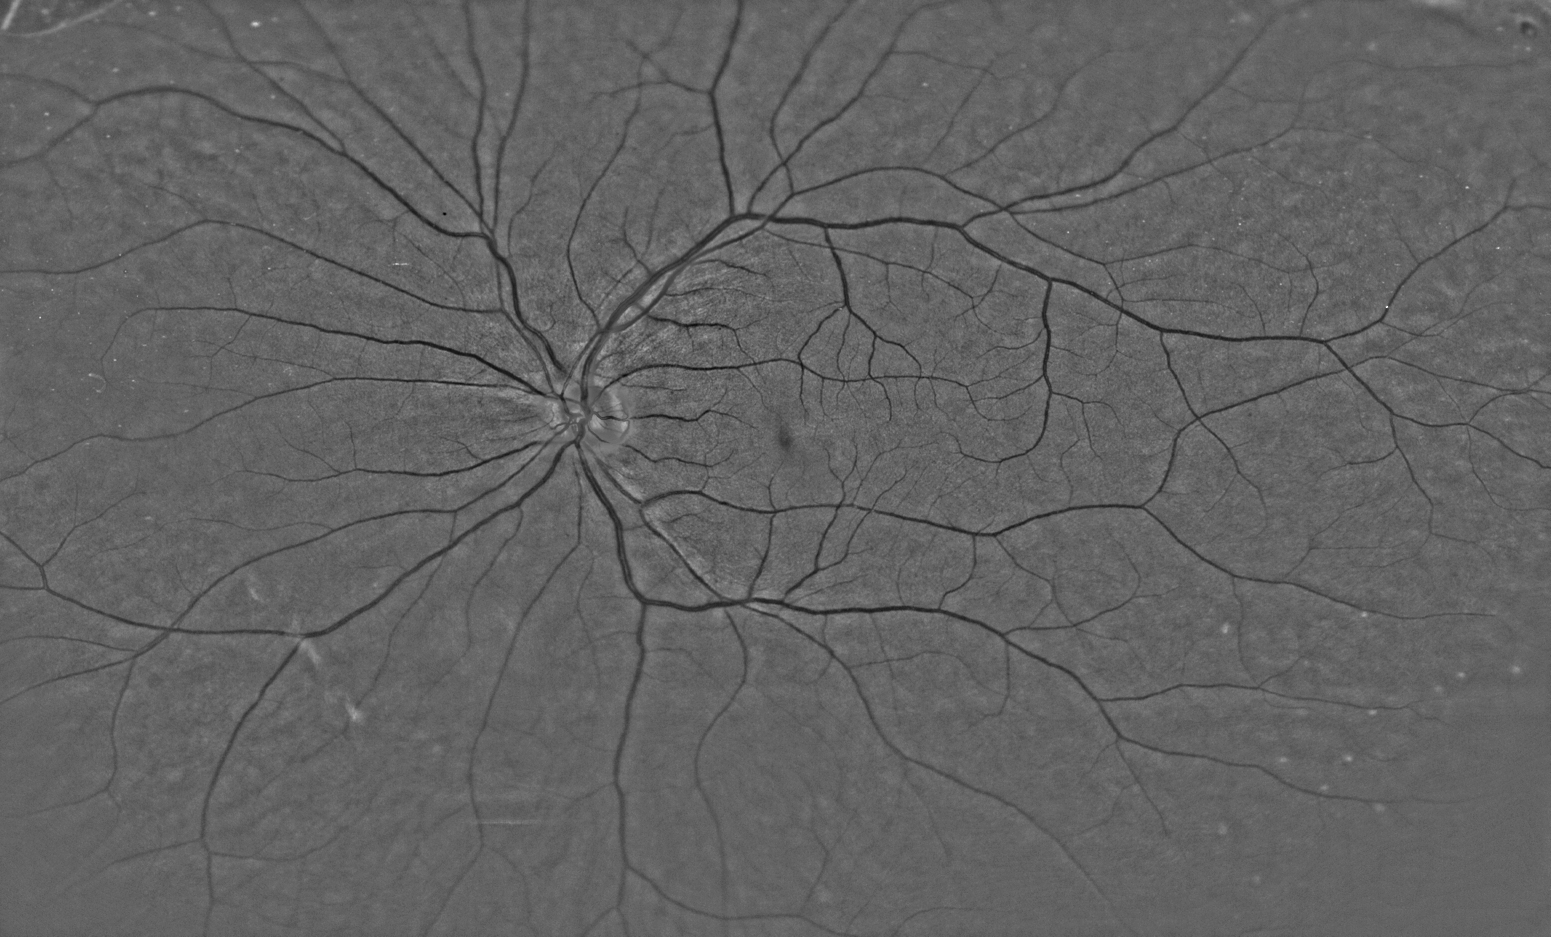

In [9]:
img.from_array(dif_bilateral)

[Log] Applying Gabor filter.
[Log] ------[ RUNNING Time: 3.999694347381592 seconds ]------


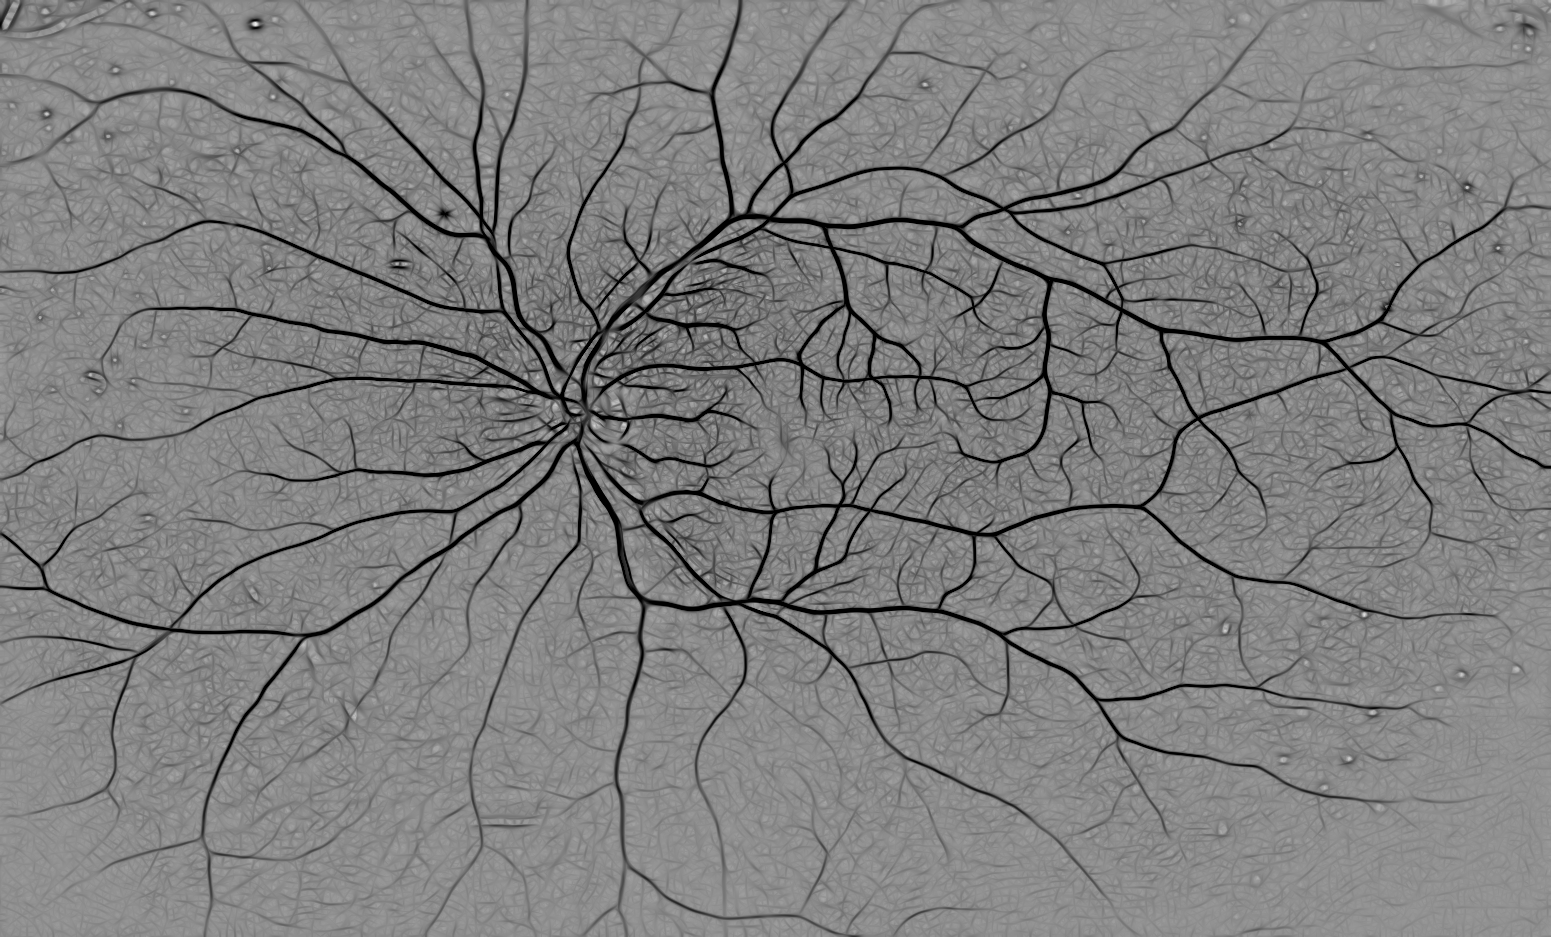

In [11]:
img.apply_gabor(255-dif_bilateral,filter_bank=fil.get_chosen_gabor_bank())
img.from_array(255-img.img_gabor)

In [12]:
img.create_skeleton_by_threshold(array_2d=img.img_gabor,threshold=5)

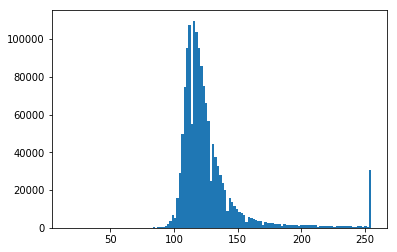

In [13]:
img.histogram(img.img_gabor.ravel(),bins=128)


In [9]:
# img.img_skeleton[255-img.img_gabor]
# img.from_array(img.img_skeleton)

In [14]:
lattice = Lattice(image_2d=img.img_skeleton)

In [15]:
lattice.generate_lattice_graph()

[Log] Creating 4-connected lattice.
[Log] ------[ RUNNING Time: 41.84718704223633 seconds ]------


In [16]:
images =  [(0.25, img.img_array[:,:,1]),(0.25, img.img_bilateral), (0.5, img.img_gabor)]

IndexError: too many indices for array

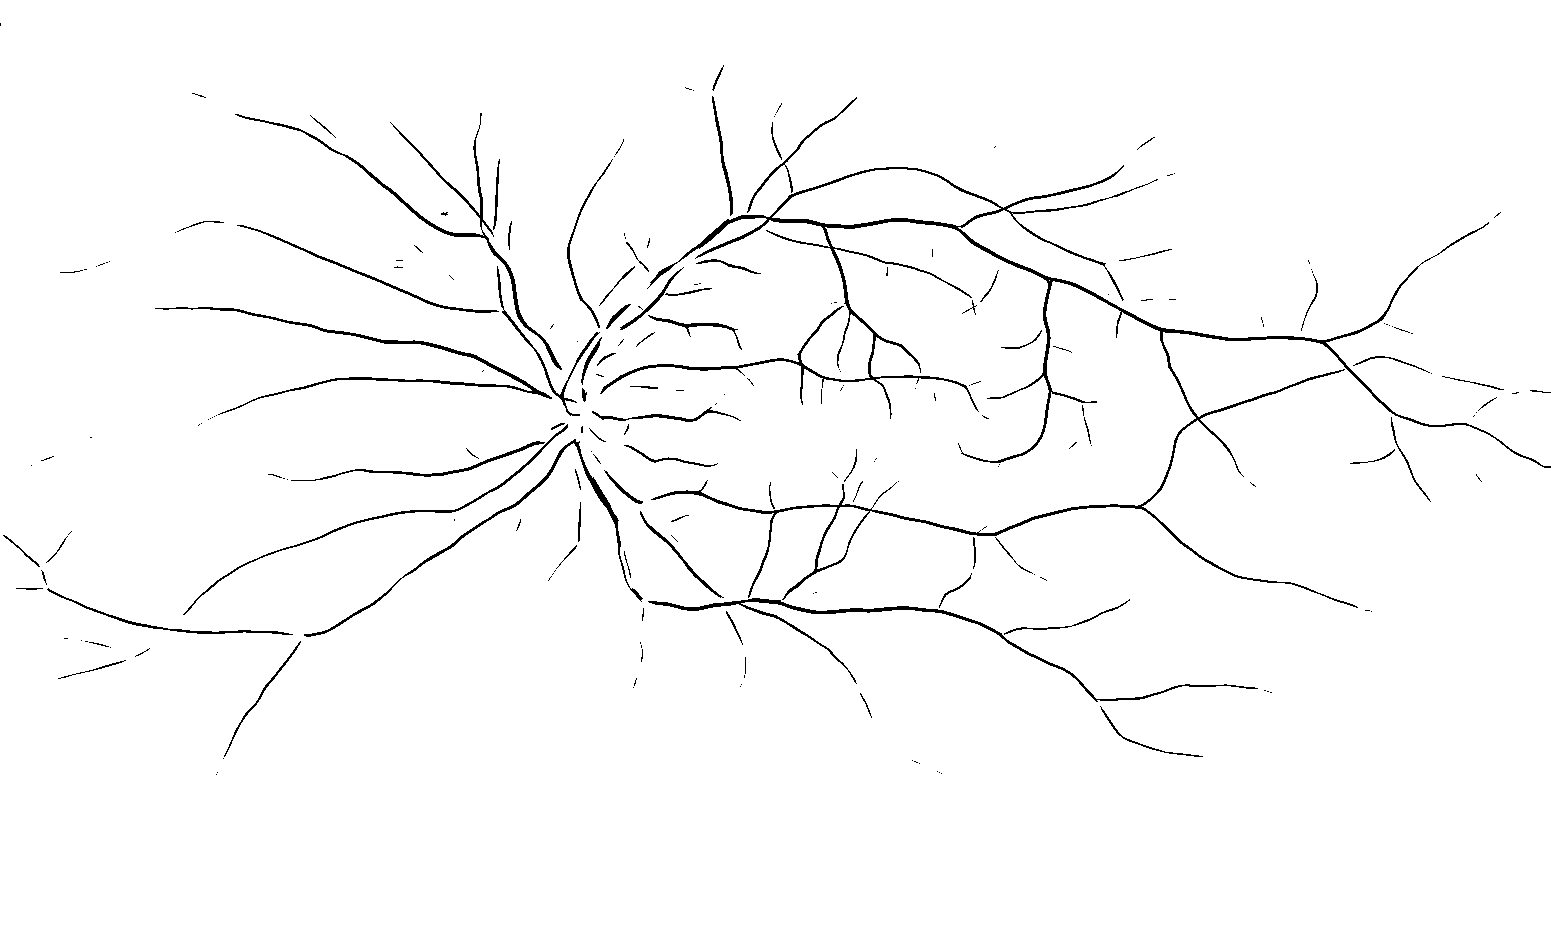

In [26]:
img.from_array(img.img_skeleton)

In [27]:
lattice.chunk_lattice(lattice.lattice, (2,2))

[Log] Chunking lattice to (2, 2) Lattices.
[Log] 0,0
[Log] 0,775
[Log] 468,0
[Log] 468,775
[Log] ------[ RUNNING Time: 7.249630928039551 seconds ]------


In [28]:
gp = lattice.k_lattices[0] 
res = lattice.get_lattice_portion(255-img.img_gabor, gp)

[Log] ------[ RUNNING Time: 0.13208961486816406 seconds ]------


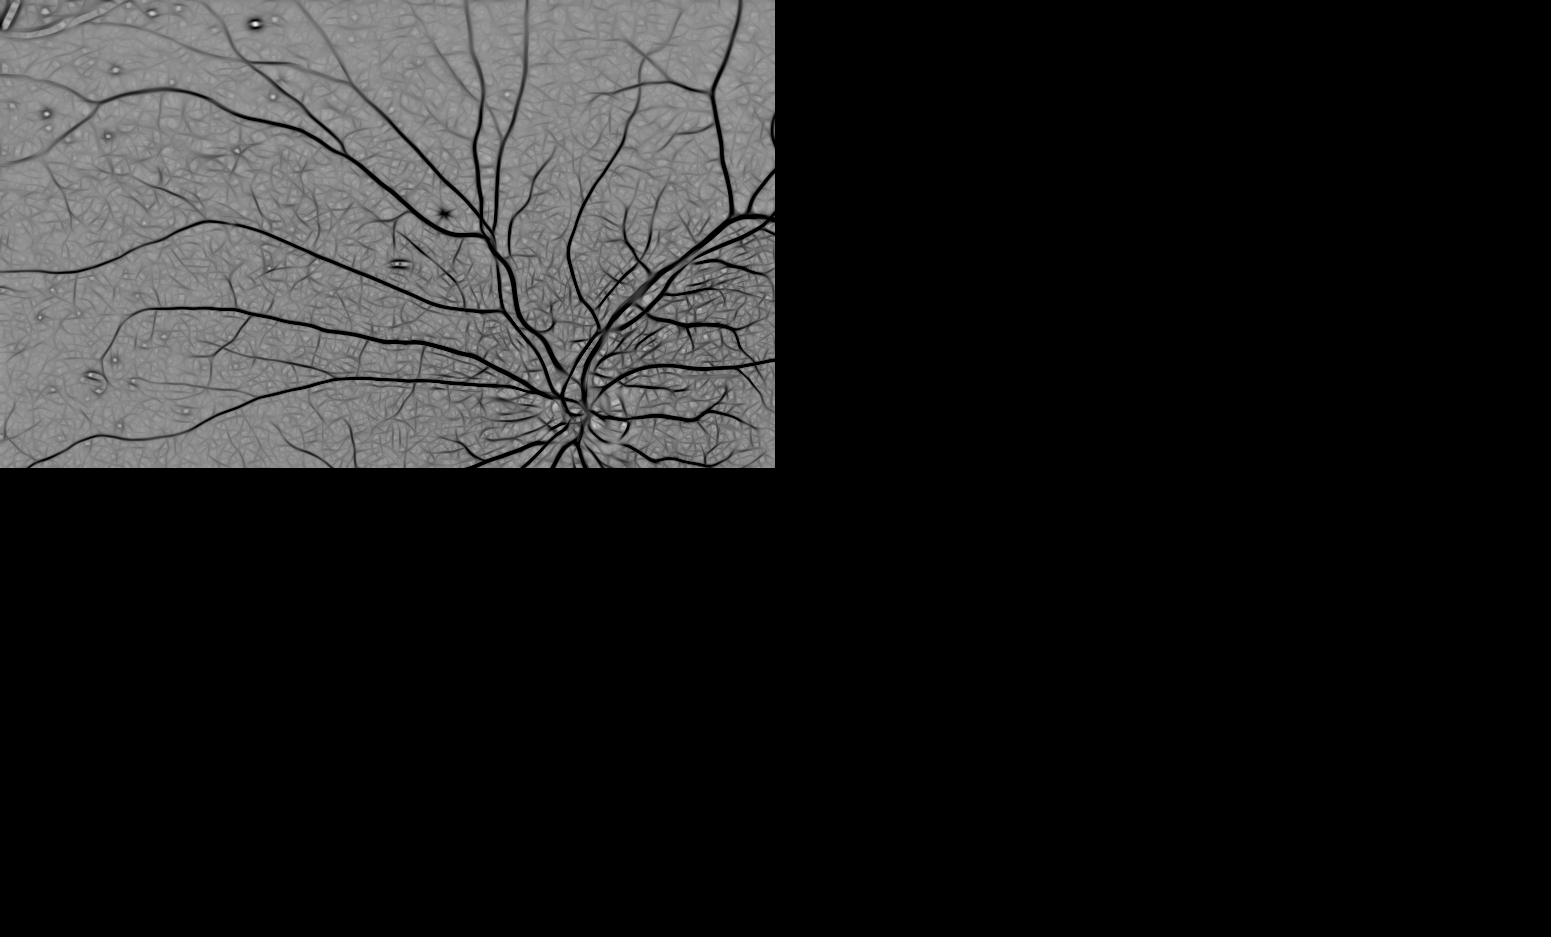

In [30]:
Image.fromarray(res)

# 

In [31]:
lattice.assign_node_metrics(graph=lattice.lattice,metrics=img.img_skeleton)

[Log] ------[ RUNNING Time: 1.0711002349853516 seconds ]------


In [32]:
# lattice.assign_cost(lattice.lattice, images=images, alpha=15)

In [33]:
# lattice.assign_cost(lattice.k_lattices[6], images=images, alpha=15)

In [20]:
can = lattice.k_lattices[6]

In [23]:
can[(312, 314)]

{(312, 313): {'cost': 2.1877744248221838,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 20.0},
 (312, 315): {'cost': 1.4701045966532127,
  'i_diff_1': 1.0,
  'i_diff_2': 0.0,
  'i_diff_3': 11.0},
 (313, 314): {'cost': 1.096614244672777,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 1.0}}

In [24]:
lattice.lattice[(312, 314)]

{(311, 314): {'cost': 1.3641136306802348,
  'i_diff_1': 1.0,
  'i_diff_2': 0.0,
  'i_diff_3': 9.0},
 (312, 313): {'cost': 2.1877744248221838,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 20.0},
 (312, 315): {'cost': 1.4701045966532127,
  'i_diff_1': 1.0,
  'i_diff_2': 0.0,
  'i_diff_3': 11.0},
 (313, 314): {'cost': 1.096614244672777,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 1.0},
 'skeleton': 255}

In [1]:
# prims = nx.algorithms.prim_mst(g,weight='cost')

In [15]:
g[(69,721)]

{(68, 721): {'cost': 1.1326404277198234,
  'i_diff_1': 0.0,
  'i_diff_2': 0.0,
  'i_diff_3': 4.0},
 (69, 720): {'cost': 2.077075464013664,
  'i_diff_1': 3.0,
  'i_diff_2': 0.0,
  'i_diff_3': 19.0},
 (69, 722): {'cost': 1.031211759115756,
  'i_diff_1': 2.0,
  'i_diff_2': 0.0,
  'i_diff_3': 0.0},
 (70, 721): {'cost': 1.0, 'i_diff_1': 0.0, 'i_diff_2': 0.0, 'i_diff_3': 0.0},
 'skeleton': 0}